In [1]:
import sys
sys.path.insert(0, "../python")

from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

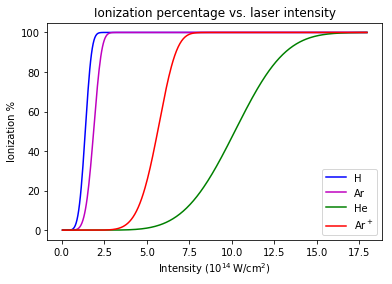

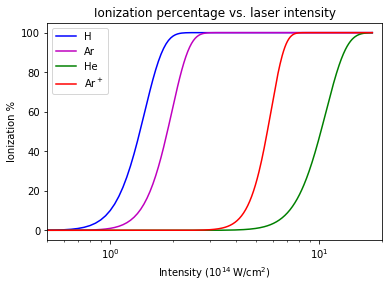

In [3]:
def ionization_plot(EI, I, t, f, tau, Z, l=0, chirp=0):
    IN = np.size(I)
    env = np.zeros(IN)
    for x in range(0, IN):
        Eenv = abs(ionization.gaussian_envelope(I[x], t, tau))
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, l, 0, True)
    return env
# Ionization rate plots
I = np.arange(0.05, 18, 0.05)
t = np.arange(-200, 200, 1)
tau = 100
f = 3*10**-1

H = ionization_plot(13.5984, I, t, f, tau, 1)*100
He = ionization_plot(24.5874, I, t, f, tau, 1)*100
Ar = ionization_plot(15.7596, I, t, f, tau, 1, l=1)*100
Ar2 = ionization_plot(27.62965, I, t, f, tau, 2, l=1)*100

plt.plot(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage vs. laser intensity')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.show()

plt.semilogx(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage vs. laser intensity')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.xlim([0.5,20])
plt.show()